# **Step 1: Load & Analyse the Data** 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/kaggle/input/datasets/durgeshchungle/zooooo/Zoo.csv")

# View structure
print(df.head())
print(df.info())
print(df.describe())

  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

## **Basic Exploration**

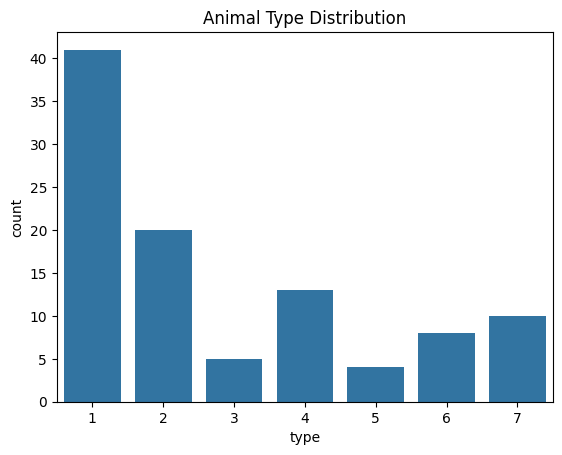

In [4]:
# Check class distribution
sns.countplot(x='type', data=df)
plt.title("Animal Type Distribution")
plt.show()



# **Step 2: Data Preprocessing**

## **Missing Values**

In [5]:
print(df.isnull().sum())

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


## **Remove non-useful column**

In [10]:
df.drop('animal name', axis=1, inplace=True)

# **Step 3: Train–Test Split (80/20)**

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('type', axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Step 4: Implement KNN (Scikit-Learn)**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

# **Step 5: Choose Distance Metric & Best K**

**🔹 Finding Optimal K**

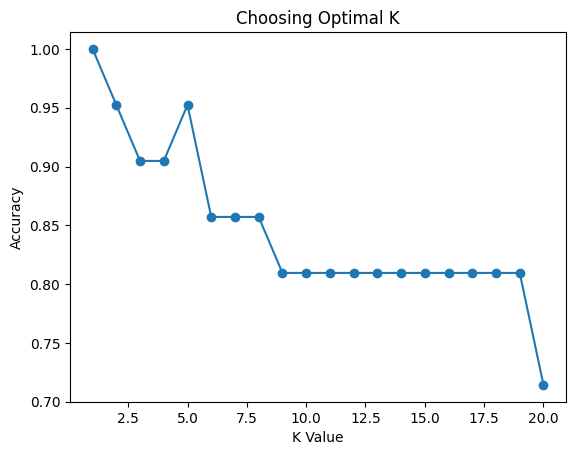

In [14]:
 import numpy as np
from sklearn.metrics import accuracy_score

accuracy = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, preds))

plt.plot(range(1,21), accuracy, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing Optimal K")
plt.show()

# **Step 6: Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# **Step 7: Visualize Decision Boundaries**

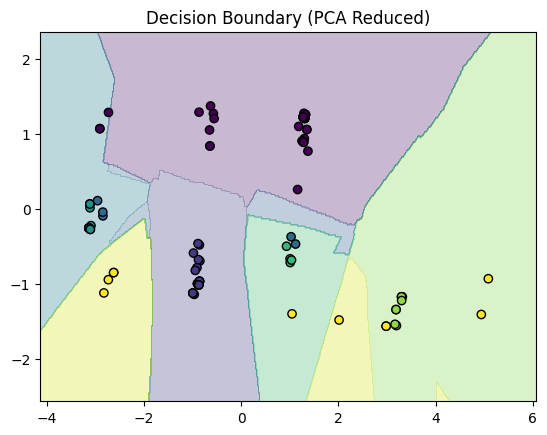

In [16]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

knn.fit(X_train_pca, y_train_pca)

# plot boundaries
h = .02
x_min, x_max = X_pca[:,0].min() - 1, X_pca[:,0].max() + 1
y_min, y_max = X_pca[:,1].min() - 1, X_pca[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolor='k')
plt.title("Decision Boundary (PCA Reduced)")
plt.show()

## **Outlier Detection**

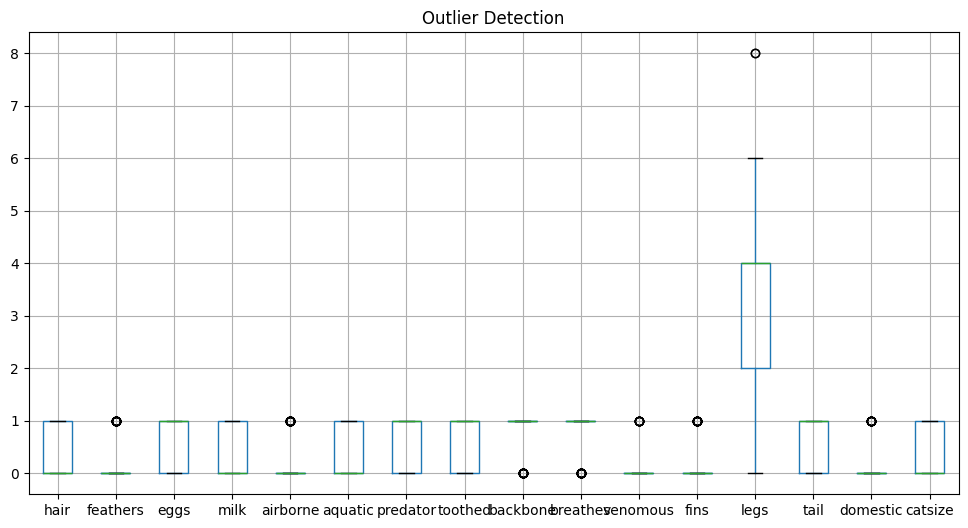

In [8]:
import matplotlib.pyplot as plt

X.boxplot(figsize=(12,6))
plt.title("Outlier Detection")
plt.show()

# 1. Key Hyperparameters in KNN

n_neighbors (K) → number of nearest neighbors used

distance metric → how distance is measured

weights → uniform or distance-based voting

algorithm → brute, kd_tree, ball_tree

leaf_size → affects speed of tree algorithms

## 2. Distance Metrics used in KNN

Common metrics:

Euclidean Distance → most common for numeric data

Manhattan Distance → useful for grid-like data

Minkowski Distance → generalized distance measure

Hamming Distance → suitable for binary features

Cosine Distance → used for text & high-dimensional data